In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
from scipy import linalg
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import sys
np.set_printoptions(threshold=sys.maxsize)
import time
from matplotlib import animation
%matplotlib inline

In [2]:
L = 1
N = 40 # the length
dx = 1/N

A

In [3]:
def matrix(N,K,L, circle = False):
    '''
    matrix sets up the matrix for the wave function for different shaped boundary conditions
    Args:
     - N: number of discritisation steps in the x direction
     - K: number of discritisation steps in the y direction
     - L: length
     - circle: if true the boundary conditions of a circle are used
    Out: 
     - matrix: a matrix for the discretized wave function
    '''
    dx = L/N
    matrix = np.zeros((N*K,N*K))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= N:
            row[i-N] = 1
        if i < (N-1)*K:
            row[i+N] = 1
        if (i+1)%K !=1:
            row[i-1] = 1
        if (i+1)%K !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    if circle == True:
        dist_list = []
        for n in range(N):
            a = (n+0.5) * dx - (L/2)
            for k in range(K):
                b = (k+0.5) * dx - (L/2)
                dist = np.sqrt(a**2 + b**2)
                dist_list = np.append(dist_list, dist)
        change_list = dist_list > (L/2)
        for i in range(len(change_list)):
            if change_list[i]:
                matrix[:, i] = 0
                matrix[i, :] = 0
        dist_list = np.array([])
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    return matrix

B) Square

In [30]:
'''
Computing a matrix for a L by L square
'''

M_squ = matrix(N,N,L)
eigen, vector = linalg.eigh(M_squ)

[ 2.85843322e-04  8.06113929e-04  1.14726757e-06 -1.13667336e-03
  1.20033319e-03 -8.38077942e-05  6.23124549e-07  2.39944951e-03
  6.88407051e-05  1.59184700e-03 -2.53254739e-03 -7.71527457e-05
 -3.17638250e-03 -7.19249672e-05  4.74211269e-03  4.73885296e-07
 -1.97406392e-03 -3.91609638e-03  4.00702936e-04  4.44074730e-03
  4.86933086e-04  5.85571091e-03 -2.33497136e-03  1.96303191e-04
  4.66835864e-03  2.00591004e-04 -1.58898724e-03 -7.61683927e-03
  3.28340484e-04  6.96697000e-03 -2.69852678e-03 -2.01733184e-05
  6.81654650e-03 -9.22610854e-03 -4.23189170e-04 -2.42283487e-05
  5.38131336e-03  8.03254119e-03 -1.41281564e-05 -1.14423834e-02
 -8.72307096e-05  1.32260327e-04 -3.03527917e-03  7.97161509e-04
 -1.06066874e-02  9.60251578e-04 -5.98190719e-03  9.60425827e-03
 -9.01670171e-03  6.92643549e-04  1.31775204e-02 -1.36643128e-04
 -4.62706554e-05  1.19748840e-02  3.40369250e-05  3.35971504e-03
  9.44317520e-05  6.69939224e-03  2.49521967e-03  1.54422263e-02
  4.42348811e-03 -1.41616

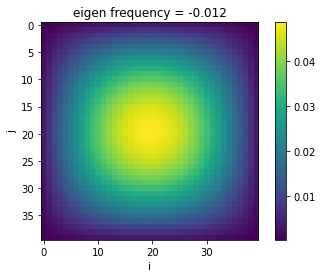

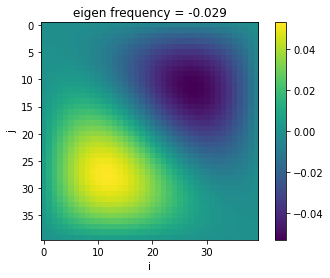

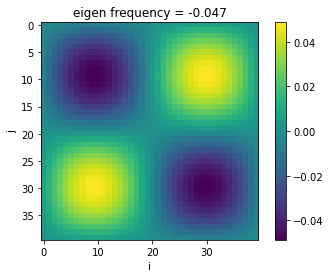

In [43]:
'''
plotting the eigen-vectors that belong to the lowest eigen values for a square
'''

smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()


B) Rectangle

In [45]:
'''
Computing a matrix for a L by 2L rectangle
'''

M_rec = matrix(N,2*N,L)
eigen, vector = linalg.eigh(M_rec)

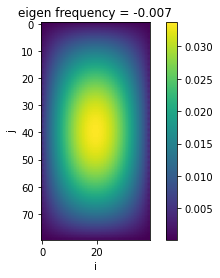

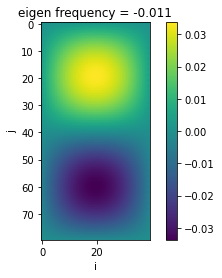

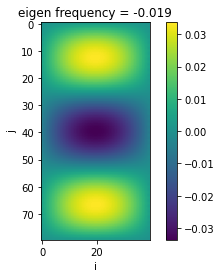

In [46]:
'''
plotting the eigen-vectors that belong to the lowest eigen values for a rectangle
'''
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N*2,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (2*N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (2*N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()


B) Circle

In [47]:
'''
Computing a matrix for a circle with diameter L
'''
M_cir = matrix(N,N,L, True)
eigen, vector = linalg.eigh(M_cir)

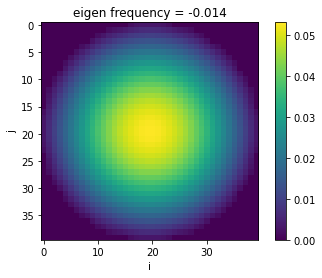

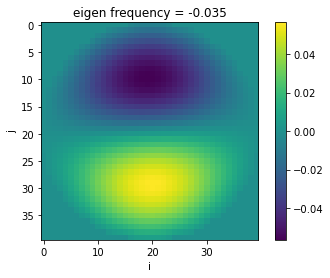

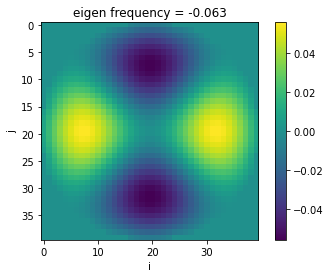

In [48]:
'''
plotting the eigen-vectors that belong to the lowest eigen values for a circle
'''
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
s = eigen[np.argmin(np.abs(eigen))]
plt.title("eigen frequency = {}".format(round(s, 3))) 
plt.xlabel('i')
plt.ylabel('j')
plt.show()


C) calculating the compution time for different shaped matrixes with and without the use of the knowledge that they are sparse matrices

In [37]:
start_time = time.time()
eigen_vectors = linalg.eigh(M_rec)
print("%s seconds, Rectangular Matrix" % (time.time() - start_time))

7.304306983947754 seconds, Rectangular Matrix


In [38]:
start_time = time.time()
eigen_vectors = eigsh(M_rec)
print("%s seconds, Sparse Rectangular Matrix" % (time.time() - start_time))

4.365479946136475 seconds, Sparse Rectangular Matrix


In [39]:
start_time = time.time()
eigen_vectors = linalg.eigh(M_squ)
print("%s seconds, Square Matrix" % (time.time() - start_time))

2.391439199447632 seconds, Square Matrix


In [40]:
start_time = time.time()
eigen_vectors = eigsh(M_squ)
print("%s seconds, Sparse Square Matrix" % (time.time() - start_time))

0.7212672233581543 seconds, Sparse Square Matrix


In [41]:
start_time = time.time()
eigen_vectors = linalg.eigh(M_cir)
print("%s seconds, Circular Matrix" % (time.time() - start_time))

1.6655683517456055 seconds, Circular Matrix


In [42]:
start_time = time.time()
eigen_vectors = eigsh(M_cir)
print("%s seconds, Sparse Circular Matrix" % (time.time() - start_time))

0.5512051582336426 seconds, Sparse Circular Matrix


D) plotting the lowest eigen-values for differently shapes matrixes

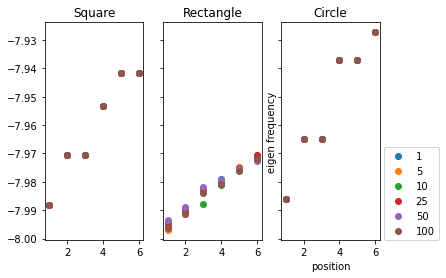

In [59]:
L_list = [1,5,10,25,50,100]

# eigen_lists_s = []
# eigen_lists_r = []
# eigen_lists_c = []

f, (squ, rec, cir) = plt.subplots(1, 3, sharey=True)
squ.set_title('Square')
rec.set_title('Rectangle')
cir.set_title('Circle')

for L in L_list:
    M_s = matrix(N,N,L)
    
    eigen_s, vector = eigsh(M_s)
    X = np.linspace(1,6,6)
#     print(eigen_s)
#     eigen_lists_s.append(eigen_s)
    squ.scatter(X, eigen_s, label = L)
    
    M_r = matrix(N,2*N,L)
    eigen_r, vector = eigsh(M_r)
#     eigen_lists_r.append(eigen_r)
    rec.scatter(X, eigen_r, label = L)
    
    M_c = matrix(N,N,L, True)
    eigen_c, vector = eigsh(M_c)
#     eigen_lists_c.append(eigen_c)
    cir.scatter(X, eigen_c, label = L)
    
plt.ylabel('eigen frequency')
plt.xlabel('position')
plt.legend(loc=(1.04,0))    
plt.show()

E)  Animating the fully discrete wave function for the lowest eigen values in a square

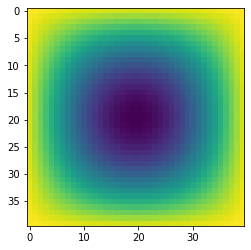

In [17]:
eigen, vector = linalg.eigh(M_squ)
l = np.min(abs(eigen))
v = vector[:,np.argmin(abs(eigen))]
v = np.reshape(v, (N,N))
plt.imshow(v)

In [18]:
def T(t):
    '''
    Args:
    -t: time ate the moment
    Out: 
    time dependent part of the wave equation at time = t
    '''
    return np.cos(l*t) + np.sin(l*t)

In [19]:
def frame_matrix(M,v):
    
    '''
    generate a matrix containing all frames for a specific wave function
    - M, number of frames and time steps
    - v, initial eigenvector
    '''
    Matrix= np.zeros((M,N,N))
    for t in range(M):
        u = v * T(t)
        Matrix[t] = u
    return Matrix    

def update(i):
    '''
    Updater function for the animation
    '''
    cax.set_data(frames[i])
    return cax
M = 1000
frames = frame_matrix(M, v)

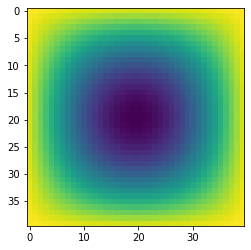

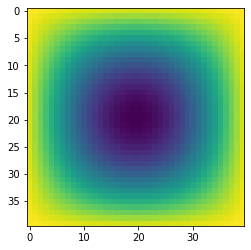

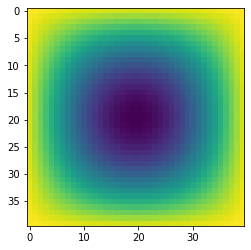

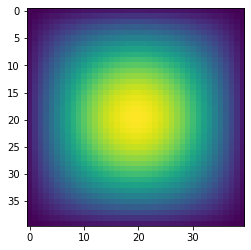

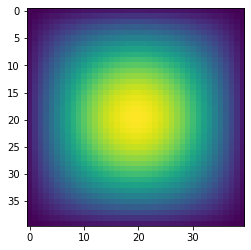

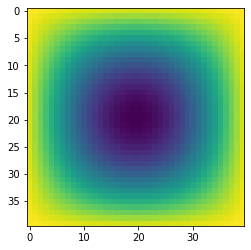

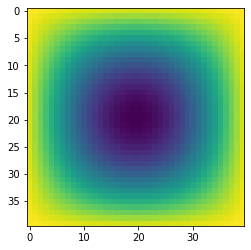

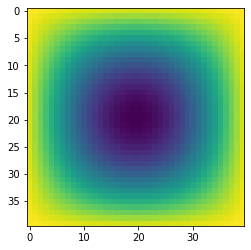

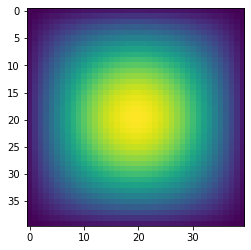

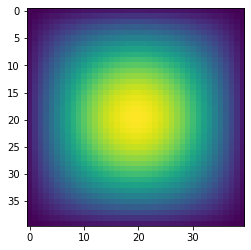

In [20]:
for i in range(M):
    if i%100 == 0:
        plt.imshow(frames[i])
        plt.show()

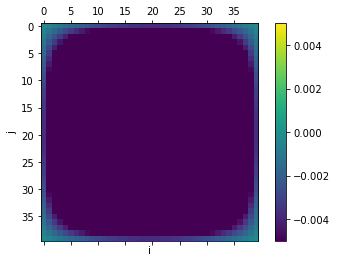

MovieWriter ffmpeg unavailable; trying to use pillow instead.


TypeError: 'str' object is not callable

In [60]:
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
fig, ax = plt.subplots()
# cax = ax.pcolormesh(x, y, frames[0, :-1, :-1], vmin=-0.005, vmax = 0.005)
ax.set_xlabel('i')
ax.set_ylabel('j')

cax = ax.matshow(v, cmap = "viridis", vmin=-0.005, vmax=0.005)
#plt.imshow(cax, vmin=-0.005, vmax=0.005)
plt.colorbar(cax)

ani = animation.FuncAnimation(fig, update, frames = M , interval=10,save_count=1)
plt.show()
ani.save('animation.mp4')